<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Day_8_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Sample Imputation

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("/content/train.csv",usecols=['Age','Fare','Survived'])

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [13]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [15]:
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [16]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [17]:
X_train.head(2)

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0


In [19]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipython-input-19-3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipython-input-19-3090101

In [22]:
X_train.sample(6)

,Age,Fare,Age_imputed
570,62.0,10.5000,62.0
650,NaN,7.8958,22.0
201,NaN,69.5500,58.0
217,42.0,27.0000,42.0
413,NaN,0.0000,53.0
145,19.0,36.7500,19.0


We just fill the NA value by the random value

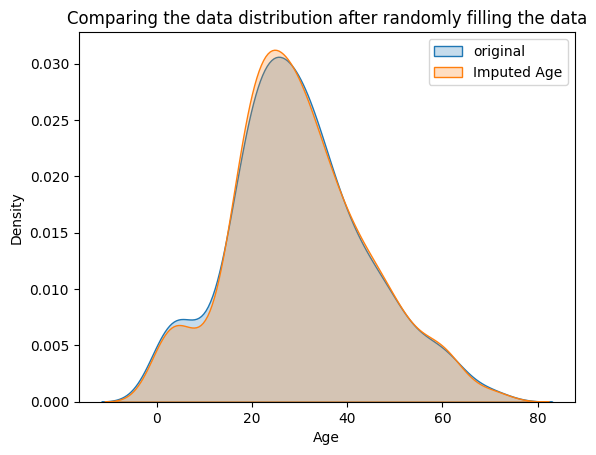

In [30]:
sns.kdeplot(X_train['Age'],label="original",fill=True,common_norm=False)
sns.kdeplot(X_train['Age_imputed'],label="Imputed Age",fill=True,common_norm=False)

plt.title("Comparing the data distribution after randomly filling the data")
plt.ylabel("Density")
plt.xlabel("Age")
plt.legend();

We can see that the distribution is almost same so their will be no performance difference in linear models

In [31]:
print("Original Variable Variance: ",X_train['Age'].var())
print("Imputed After random imputation: ",X_train['Age_imputed'].var())

Original Variable Variance:  204.3495133904614
Imputed After random imputation:  200.45903487867224


In [32]:
X_train[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,72.208600
Age,71.512440,204.349513,204.349513
Age_imputed,72.208600,204.349513,200.459035


<Axes: >

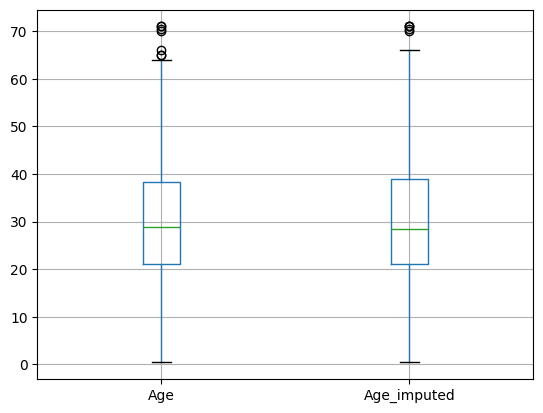

In [34]:
X_train[['Age','Age_imputed']].boxplot()

For Categorical Data

In [42]:
data = pd.read_csv("/content/house-train.csv",usecols=['GarageQual','FireplaceQu','SalePrice'])

In [43]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [44]:
data.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [45]:
X = data
y = data['SalePrice']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [47]:
X_train["GarageQual_imputed"] = X_train["GarageQual"]
X_test["GarageQual_imputed"] = X_test["GarageQual"]

X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"]
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"]

In [48]:
X_train.sample()

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1145,Gd,TA,149000,TA,Gd


In [49]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-49-856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/t

In [60]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() /len(X_train)
    ],
    axis=1
)

temp.columns = ['Original','imputed']

In [61]:
temp

,Original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


The Difference between the Ratios is not much large so it is applicable

In [56]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() /len(df)
    ],
    axis=1
)

temp.columns = ['Original','imputed']

In [62]:
temp

,Original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.001712
Ex,0.000907,0.000856


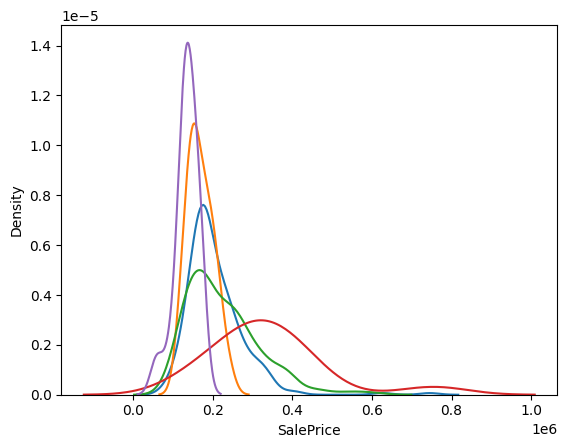

In [63]:
for category in X_train['FireplaceQu'].dropna().unique():
  sns.kdeplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],label=category)

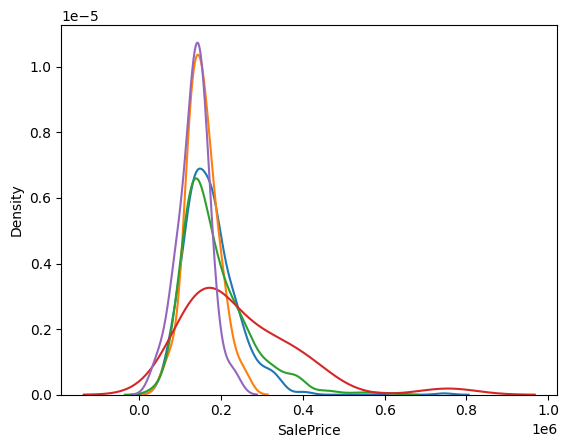

In [64]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
  sns.kdeplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],label=category)

/tmp/ipython-input-65-2013449720.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train[X_train['GarageQual'] == category]['SalePrice'],label=category)
/tmp/ipython-input-65-2013449720.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train[X_train['GarageQual'] == category]['SalePrice'],label=category)


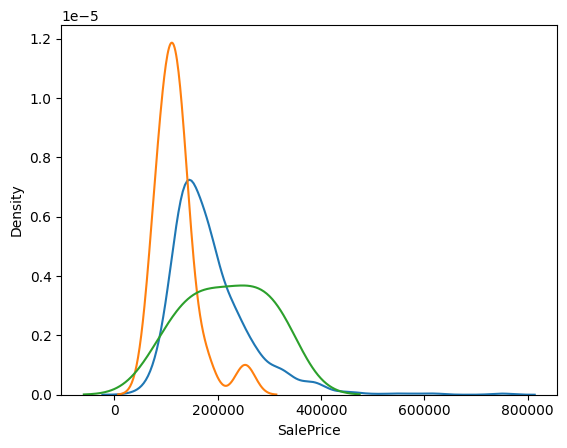

In [65]:
for category in X_train['GarageQual'].dropna().unique():
  sns.kdeplot(X_train[X_train['GarageQual'] == category]['SalePrice'],label=category)

/tmp/ipython-input-66-3984257664.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(X_train[X_train['GarageQual_imputed'] == category]['SalePrice'],label=category)


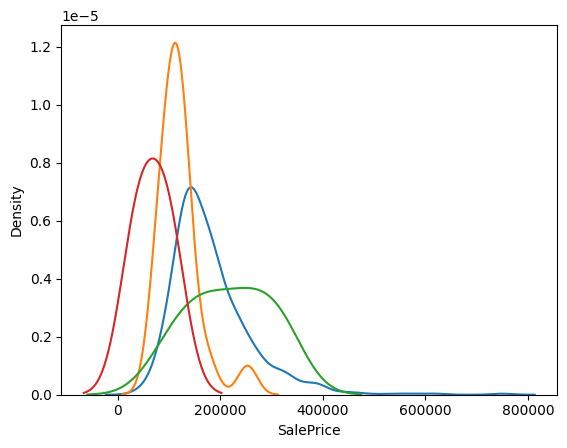

In [66]:
for category in X_train['GarageQual_imputed'].dropna().unique():
  sns.kdeplot(X_train[X_train['GarageQual_imputed'] == category]['SalePrice'],label=category)